In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tqdm import tqdm  # For progress bars


This code loads the transformed dataset, splits it into training (2010–2016) and testing (2017–2018) subsets based on the 'Year' column, displays their shapes, and optionally saves the subsets to new CSV files for feature selection.

In [8]:
import pandas as pd

# Path to the transformed data file
data_path = "/Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/2_feature_standardization/final_data_transformed.csv"

# Load the transformed data
df = pd.read_csv(data_path)

# Separate training and testing sets based on the 'Year' column
train_df = df[df['Year'].between(2010, 2016)]
test_df = df[df['Year'].between(2017, 2018)]

# Display the shape of the training and testing sets
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

# Optional: save the training and testing sets to new files if needed
train_df.to_csv('/Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/train_data.csv', index=False)
test_df.to_csv('/Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/test_data.csv', index=False)

Training set shape: (707, 180)
Test set shape: (202, 180)


This code loads the training dataset, sorts it by GEO_ID and Year, removes irrelevant columns (GEO_ID, Year, and a list of specified features), and separates the target variable (target_TOT_POPULATION) from the independent features (X) for further feature selection or modeling.

In [9]:
# Load and prepare the training data
train_data_path = "/Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/train_data.csv"
train_df = pd.read_csv(train_data_path)

# Prepare the data: Sort by GEO_ID and Year, then clean
train_df = train_df.sort_values(by=['GEO_ID', 'Year'])

# Remove 'GEO_ID' and 'Year' columns
train_df = train_df.drop(columns=['GEO_ID', 'Year'], errors='ignore')

# Remove these columns for the time being
columns_to_remove = ['TOT_HH', 'CIV_POP_18+', 'TOT_CIV_POP', 'CIV_POP_16', 'TOT_HOUSING_UNITS', 'TOT_POPULATION']
train_df = train_df.drop(columns = columns_to_remove)

# Define the dependent variable and independent features
y = train_df['target_TOT_POPULATION']  # Target variable
X = train_df.drop(columns=['target_TOT_POPULATION'])  # Features

print(train_df)

     AVG_HH_SZ  AVG_FAM_SZ  P_HH_65PLUS  P_HH_UNDER18  P_MALES_NEVER_MARRIED  \
0     0.173854   -0.489778    -1.997776      0.971077              -1.232175   
1     0.147751   -0.282308    -1.773098      0.809911              -1.029825   
2     0.302937    0.187436    -1.448562      0.393567              -0.292691   
3     0.454785   -0.146086    -1.173956      0.541302              -0.784113   
4     0.379269   -0.248098    -1.248848      0.474150              -0.726299   
..         ...         ...          ...           ...                    ...   
702  -0.311421   -0.179987    -1.099063      0.299554               1.109309   
703  -0.339384   -0.179987    -0.949277      0.098097               1.355021   
704  -0.395645   -0.213991    -0.724599      0.071236               1.369474   
705  -0.367458    0.154525    -0.599778     -0.130220               1.557371   
706  -0.311421    0.055209    -0.799492     -0.036207               1.701907   

     P_FEMALES_NEVER_MARRIED  P_MALES_W

This code computes the correlation matrix for the training features (X) to quantify relationships between variables, then visualizes it as a heatmap using Seaborn to identify highly correlated features or potential multicollinearity.

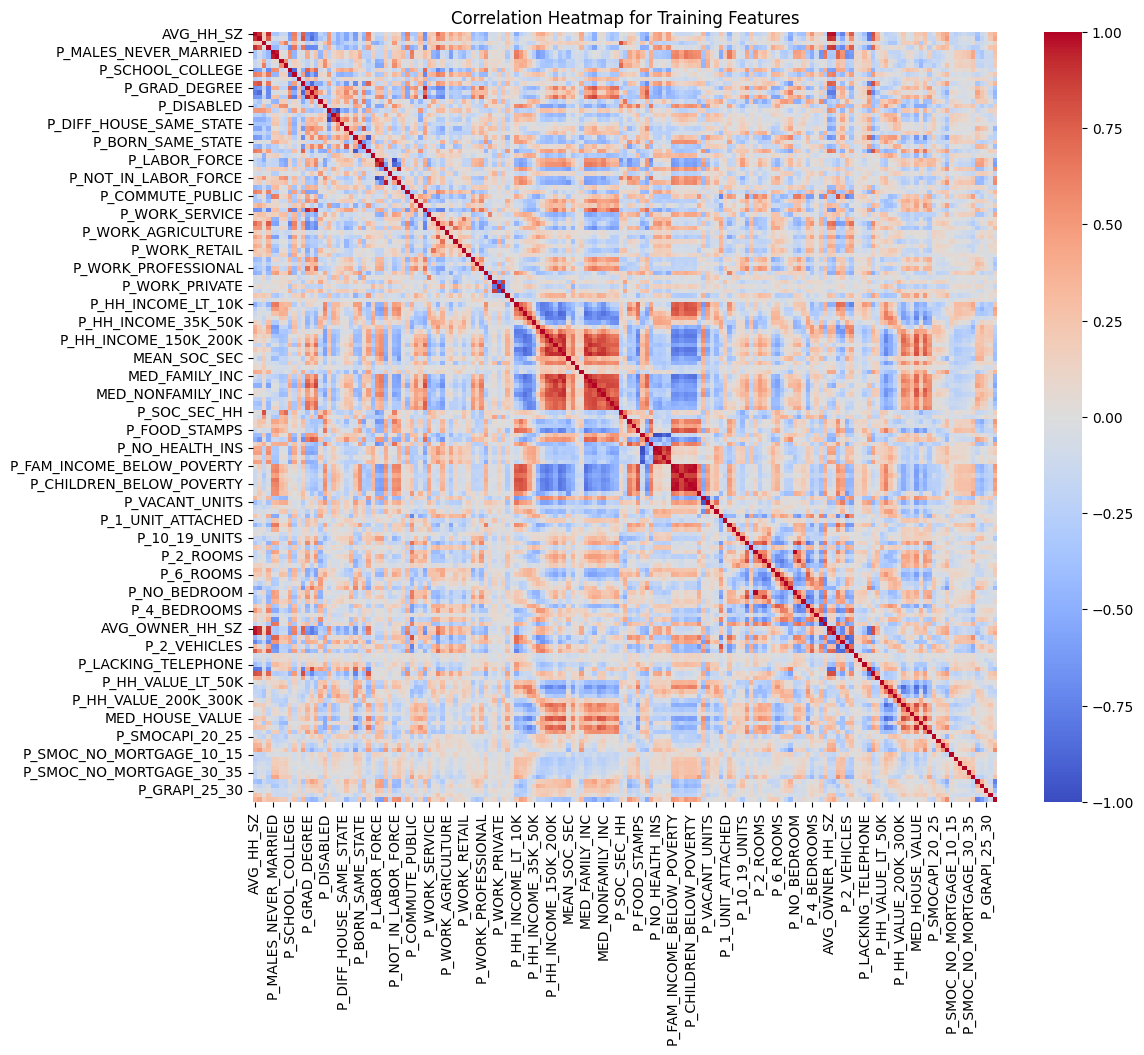

In [10]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Training Features')
plt.show()

This code defines a function find_problematic_values to identify columns in the training features (X) and target variable (y) that contain problematic values, such as NaNs, infinities, or excessively large numbers. The function outputs dictionaries summarizing the affected columns and the count or values of the problematic entries.

In [11]:
import pandas as pd
import numpy as np

# Assuming X and y have been defined as your features and target from the training data

# Function to check for problematic values in the dataset
def find_problematic_values(X, y):
    # Initialize dictionaries to store problematic columns
    nan_columns = {}
    inf_columns = {}
    large_value_columns = {}

    # Check for NaN values in each column of X
    for column in X.columns:
        if X[column].isnull().any():
            nan_columns[column] = X[column].isnull().sum()
            
        if np.isinf(X[column]).any():
            inf_columns[column] = np.isinf(X[column]).sum()
            
        if (X[column].abs() > 1e10).any():  # Threshold can be adjusted
            large_value_columns[column] = X[column][X[column].abs() > 1e10].values

    # Check for NaN, inf, or large values in y
    if y.isnull().any():
        nan_columns['y'] = y.isnull().sum()
        
    if np.isinf(y).any():
        inf_columns['y'] = np.isinf(y).sum()
        
    if (y.abs() > 1e10).any():  # Threshold can be adjusted
        large_value_columns['y'] = y[y.abs() > 1e10].values

    # Display problematic columns and counts
    print("Columns with NaN values:", nan_columns)
    print("Columns with infinite values:", inf_columns)
    print("Columns with excessively large values:", large_value_columns)

# Run the function to find problematic values in X and y
find_problematic_values(X, y)

Columns with NaN values: {}
Columns with infinite values: {}
Columns with excessively large values: {}


Correlation-Based Feature Selection: This code identifies the top 35 features most strongly correlated with the target variable (target_TOT_POPULATION) by calculating absolute correlations and sorting them in descending order. It visualizes these features through a heatmap of their pairwise correlations and a bar chart of their individual correlations with the target.

Calculating Correlations:   0%|          | 0/100 [00:00<?, ?it/s]

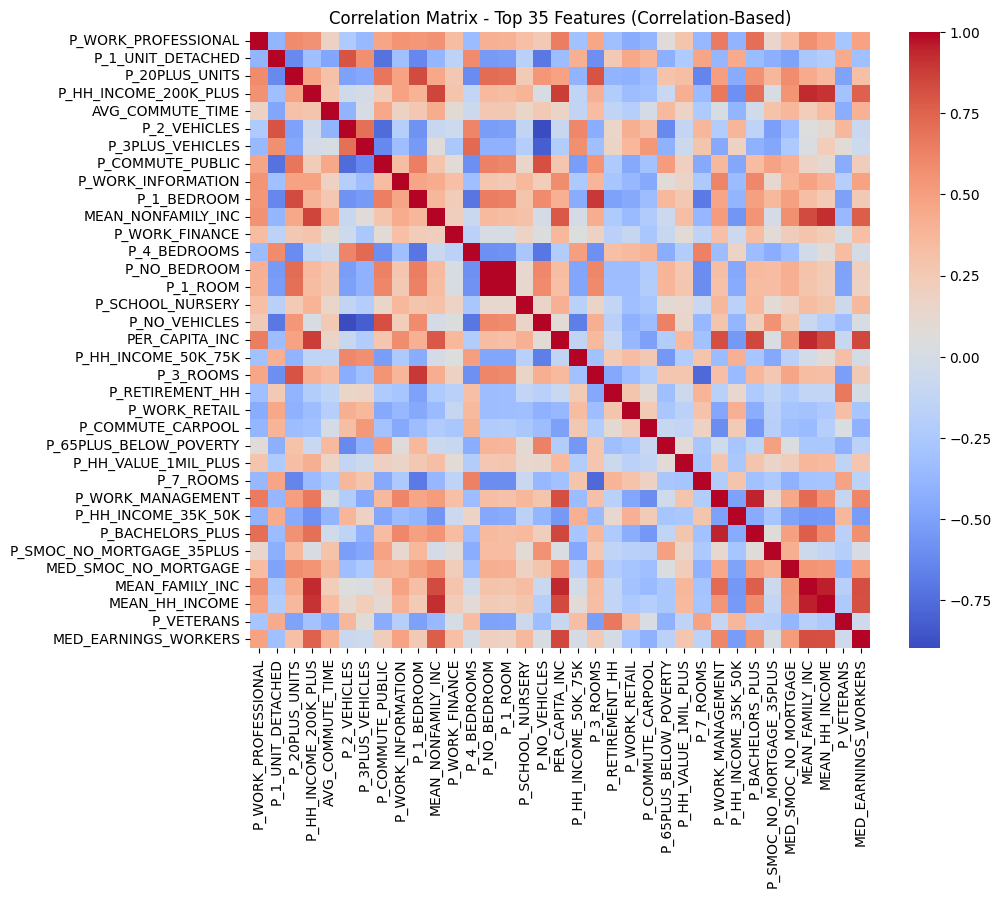

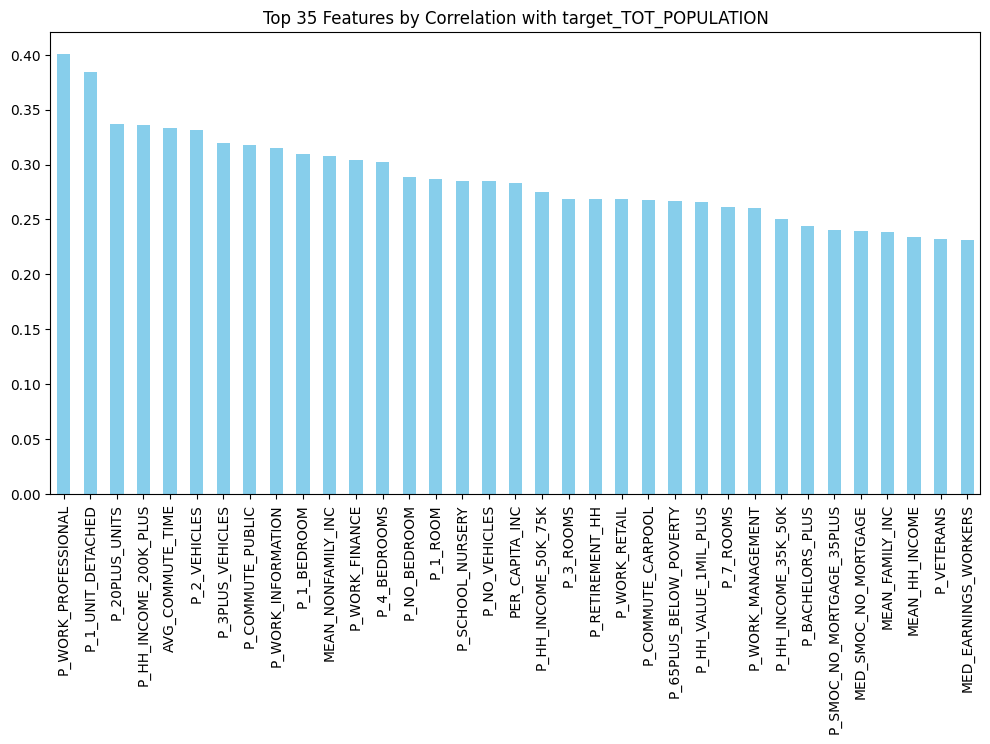

Calculating Correlations: 100%|██████████| 100/100 [00:00<00:00, 245.40it/s]


In [12]:

### 1. Correlation-Based Feature Selection
def correlation_feature_selection(X, y, top_n=35):
    with tqdm(total=100, desc="Calculating Correlations") as pbar:
        # Calculate correlations with the target
        correlations = X.corrwith(y).abs().sort_values(ascending=False)
        pbar.update(50)  # Update progress halfway

        selected_features = correlations.index[:top_n]
        
        # Plot correlation matrix for selected features
        plt.figure(figsize=(10, 8))
        sns.heatmap(X[selected_features].corr(), annot=False, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix - Top 35 Features (Correlation-Based)')
        plt.show()
        
        # Bar chart of correlations
        plt.figure(figsize=(12, 6))
        correlations[selected_features].plot(kind='bar', color='skyblue')
        plt.title('Top 35 Features by Correlation with target_TOT_POPULATION')
        plt.show()
        
        pbar.update(50)  # Complete progress

    return selected_features

# Run Correlation-Based Feature Selection
selected_corr_features = correlation_feature_selection(X, y)

This code performs Recursive Feature Elimination (RFE) using a RandomForestRegressor to select the top 35 features, removing features in steps of 5 for faster computation. A progress bar tracks the process, and the selected features are printed and returned.

In [13]:
# Recursive Feature Elimination (RFE) with faster configurations
def rfe_feature_selection(X, y, top_n=35, step=5):
    # Use RandomForestRegressor for feature importance estimation
    model = RandomForestRegressor(random_state=42, n_jobs=-1)  # Use multiple cores if available
    rfe = RFE(estimator=model, n_features_to_select=top_n, step=step)
    
    # Fit RFE with a progress bar
    with tqdm(total=len(X.columns) // step, desc="Performing RFE") as pbar:
        rfe.fit(X, y)
        pbar.update(len(X.columns) // step)  # Update progress based on steps

    # Select features based on RFE results
    selected_features = X.columns[rfe.support_]
    print("Selected features using RFE:", selected_features)
    
    return selected_features

# Run RFE with faster settings
selected_rfe_features = rfe_feature_selection(X, y, top_n=35, step=5)

Performing RFE: 100%|██████████| 34/34 [00:08<00:00,  3.82it/s]

Selected features using RFE: Index(['AVG_HH_SZ', 'AVG_FAM_SZ', 'P_LT_9GRADE', 'P_GRAD_DEGREE', 'P_DISABLED',
       'P_SAME_HOUSE_1YR', 'P_DIFF_HOUSE_SAME_STATE', 'P_BORN_SAME_STATE',
       'P_BORN_DIFF_STATE', 'P_LABOR_FORCE', 'P_COMMUTE_PUBLIC',
       'AVG_COMMUTE_TIME', 'P_WORK_PRODUCTION', 'P_WORK_CONSTRUCTION_INDUSTRY',
       'P_WORK_TRANSPORTATION', 'P_WORK_FINANCE', 'P_WORK_PROFESSIONAL',
       'P_WORK_EDUCATION', 'P_WORK_SELF_EMPLOYED', 'P_HH_INCOME_LT_10K',
       'P_HH_INCOME_50K_75K', 'P_HH_INCOME_200K_PLUS', 'P_PRIV_HEALTH_INS',
       'P_1_UNIT_DETACHED', 'P_5_9_UNITS', 'P_MOBILE_HOMES', 'P_3_BEDROOMS',
       'P_RENTER_OCCUPIED', 'AVG_OWNER_HH_SZ', 'AVG_RENTER_HH_SZ',
       'P_3PLUS_VEHICLES', 'P_LESS_OCCUPANTS_1', 'P_HH_VALUE_50K_100K',
       'P_HH_VALUE_1MIL_PLUS', 'MED_SMOC_MORTGAGE'],
      dtype='object')



This code applies Sequential Feature Selection (SFS) using a LinearRegression model to iteratively select the top 35 features in a forward direction. A progress bar tracks the selection process, and the final selected features are printed and returned.

In [14]:
### 3. Sequential Feature Selection (SFS)
def sfs_feature_selection(X, y, top_n=35):
    model = LinearRegression()
    sfs = SequentialFeatureSelector(model, n_features_to_select=top_n, direction="forward")
    
    with tqdm(total=top_n, desc="Performing SFS") as pbar:
        for i in range(top_n):
            sfs.fit(X, y)
            pbar.update(1)  # Update progress as each feature is selected
    
    # Select features based on SFS
    selected_features = X.columns[sfs.get_support()]
    print("Selected features using Sequential Feature Selector:")
    print(selected_features)
    
    return selected_features

# Run SFS
selected_sfs_features = sfs_feature_selection(X, y)


Performing SFS: 100%|██████████| 35/35 [10:31<00:00, 18.04s/it]

Selected features using Sequential Feature Selector:
Index(['P_SCHOOL_NURSERY', 'P_BACHELORS_PLUS', 'P_DIFF_HOUSE_SAME_STATE',
       'P_DIFF_HOUSE_DIFF_STATE', 'P_LABOR_FORCE', 'P_EMPLOYED',
       'P_NOT_IN_LABOR_FORCE', 'P_COMMUTE_PUBLIC', 'P_WORK_FROM_HOME',
       'P_WORK_SERVICE', 'P_WORK_CONSTRUCTION', 'P_WORK_TRANSPORTATION',
       'P_WORK_PROFESSIONAL', 'P_WORK_UNPAID_FAMILY', 'MEAN_SUPP_SEC',
       'P_PUB_ASSISTANCE_HH', 'P_FOOD_STAMPS', 'P_PUB_HEALTH_INS',
       'P_OCCUPIED_UNITS', 'HOMEOWNER_VACANCY_RATE', 'P_3_BEDROOMS',
       'P_4_BEDROOMS', 'P_3PLUS_VEHICLES', 'P_LACKING_PLUMBING',
       'P_LACKING_TELEPHONE', 'P_OCCUPANTS_1_5PLUS', 'P_HH_VALUE_LT_50K',
       'P_HH_VALUE_200K_300K', 'P_HH_VALUE_1MIL_PLUS', 'P_SMOCAPI_25_30',
       'P_SMOCAPI_30_35', 'P_SMOC_NO_MORTGAGE_15_20', 'P_GRAPI_15_20',
       'P_GRAPI_20_25', 'P_GRAPI_30_35'],
      dtype='object')



This code saves feature sets selected by different methods (SFS, RFE, Correlation) into separate CSV files. It creates a specified output folder if it doesn't exist, then iterates through the feature sets, writing each to a CSV file in the folder while printing the file paths for confirmation.

In [15]:
import pandas as pd
import os

# Assuming these are the feature sets
selected_sfs_features = set(selected_sfs_features)
selected_rfe_features = set(selected_rfe_features)
selected_corr_features = set(selected_corr_features)

# Define output paths
output_folder = "/Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/"
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# Save individual feature sets to CSV files
feature_sets = {
    "SFS_Features": selected_sfs_features,
    "RFE_Features": selected_rfe_features,
    "Correlation_Features": selected_corr_features
}

for name, feature_set in feature_sets.items():
    file_path = os.path.join(output_folder, f"{name}.csv")
    pd.DataFrame({"Features": list(feature_set)}).to_csv(file_path, index=False)
    print(f"Saved {name} to {file_path}")


Saved SFS_Features to /Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/SFS_Features.csv
Saved RFE_Features to /Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/RFE_Features.csv
Saved Correlation_Features to /Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/Correlation_Features.csv


This code calculates the intersections of features selected by different methods (SFS & RFE, SFS & Correlation, RFE & Correlation) and computes their union. It then saves each intersection and the union of these intersections into separate CSV files, writing them to the specified output folder while confirming the file paths in the console.

In [18]:
intersection_sfs_rfe = selected_sfs_features.intersection(selected_rfe_features)
intersection_sfs_corr = selected_sfs_features.intersection(selected_corr_features)
intersection_rfe_corr = selected_rfe_features.intersection(selected_corr_features)

# Union of the three intersections
union_of_intersections = intersection_sfs_rfe.union(intersection_sfs_corr, intersection_rfe_corr)

# Save the union of intersections
subset_data = {
    "Subset_1": intersection_sfs_rfe,
    "Subset_2": intersection_sfs_corr,
    "Subset_3": intersection_rfe_corr,
    "final_features": union_of_intersections
}

for subset_name, subset_features in subset_data.items():
    file_path = os.path.join(output_folder, f"{subset_name}.csv")
    pd.DataFrame({"Features": list(subset_features)}).to_csv(file_path, index=False)
    print(f"Saved {subset_name} to {file_path}")


Saved Subset_1 to /Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/Subset_1.csv
Saved Subset_2 to /Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/Subset_2.csv
Saved Subset_3 to /Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/Subset_3.csv
Saved final_features to /Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/final_features.csv


This code generates a metadata file describing the contents of each feature selection CSV file, including the individual feature sets and their intersections. It combines these descriptions into a structured list, which is then saved as a CSV file named Feature_Selection_Metadata.csv in the output folder, with a console confirmation of its location.

In [17]:
metadata = []

# Add metadata for individual feature sets
for name in feature_sets.keys():
    description = f"This file contains features selected using the {name.split('_')[0]} feature selection method."
    metadata.append({"File": f"{name}.csv", "Description": description})

# Add metadata for subsets
subset_descriptions = [
    "This file contains the intersection of features selected by SFS and RFE methods.",
    "This file contains the intersection of features selected by SFS and Correlation methods.",
    "This file contains the intersection of features selected by RFE and Correlation methods.",
    "This file contains the union of all three intersections: (SFS ∩ RFE), (SFS ∩ Correlation), and (RFE ∩ Correlation)."
]

for i, subset_name in enumerate(subset_data.keys()):
    metadata.append({"File": f"{subset_name}.csv", "Description": subset_descriptions[i]})

# Save metadata to a CSV file
metadata_path = os.path.join(output_folder, "Feature_Selection_Metadata.csv")
pd.DataFrame(metadata).to_csv(metadata_path, index=False)
print(f"Saved metadata to {metadata_path}")


Saved metadata to /Users/avakrocheski-meyer/Downloads/TASK: 1119_start_to_finish/3_feature_selection/Feature_Selection_Metadata.csv
